In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rc('font', **{'family': 'Microsoft YaHei, SimHei'})  # 设置中文字体的支持
# sns.set(font='SimHei')  # 解决Seaborn中文显示问题，但会自动添加背景灰色网格
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
from sklearn import preprocessing
import time

In [2]:
bike=pd.read_csv(r"C:\Users\m1533\Desktop\研一下\python\项目\bike_data.csv",encoding='gbk')
bike.head()

,OrderNumber,LineNumber,Model
0,cumid51178,1,山地英骑
1,cumid51178,2,山地车水壶架
2,cumid51178,3,运动水壶
3,cumid51184,1,山地英骑
4,cumid51184,2,hl山地外胎


In [3]:
print(bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52761 entries, 0 to 52760
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OrderNumber  52761 non-null  object
 1   LineNumber   52761 non-null  int64 
 2   Model        52761 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None


# 探索性分析

In [4]:
bike.isnull().sum()#不存在缺失值

OrderNumber    0
LineNumber     0
Model          0
dtype: int64

In [5]:
bike.duplicated().sum()# 不存在数据冗余

0

In [6]:
bike['Model'].nunique()

37

In [7]:
bike['Model'].value_counts()

运动型头盔                      6171
运动水壶                       4076
修补工具                       3010
山地车内胎                      2908
山地英骑                       2477
公路车内胎                      2216
自行车帽                       2095
山地车挡泥板                     2014
山地车水壶架                     1941
公路车水壶架                     1702
长袖骑车衣                      1642
短袖经典车衣                     1537
竞速公路车                      1443
旅游车内胎                      1397
半掌手套                       1363
hl山地外胎                     1331
旅游型自行车(小)                  1255
ml山地外胎                     1083
公路车550                     1033
ll公路车外胎                     980
Women's Mountain Shorts     958
公路车350                      929
ml公路外胎                      890
旅游自行车外胎(通用)                 881
洗车喷剂                        864
hl公路外胎                      804
ll山地胎                       799
水壶包                         706
普通公路车                       706
山地车400                      543
竞速袜                         543
旅游型自行车(大

In [8]:
model=bike['Model'].nunique()
modelnames=bike['Model'].unique()
print("共有"+str(model)+"种商品\n")
print("商品名分别为：\n")
#每行显示5个
for i in range(0,len(modelnames),5):
    print(modelnames[i:i+5])

共有37种商品

商品名分别为：

['山地英骑' '山地车水壶架' '运动水壶' 'hl山地外胎' '山地车内胎']
['运动型头盔' '普通公路车' '公路车内胎' 'hl公路外胎' '竞速公路车']
['公路车水壶架' '长袖骑车衣' '山地车挡泥板' '自行车帽' '山地车400']
['ml山地外胎' '修补工具' '山地车500' '公路车550' '短袖经典车衣']
['旅游型自行车(大)' '竞速袜' '半掌手套' '公路车350' 'ml公路外胎']
['水壶包' '旅游型自行车(小)' '旅游型自行车(中)' '旅游车内胎' 'll公路车外胎']
['旅游自行车外胎(通用)' '万能自行车座' '洗车喷剂' '经典背心' 'll山地胎']
['故障栓钩' "Women's Mountain Shorts"]


In [9]:
bestseller=bike.groupby('Model')['Model'].count().sort_values(ascending=False).reset_index(name='count')
bestseller.head()

,Model,count
0,运动型头盔,6171
1,运动水壶,4076
2,修补工具,3010
3,山地车内胎,2908
4,山地英骑,2477


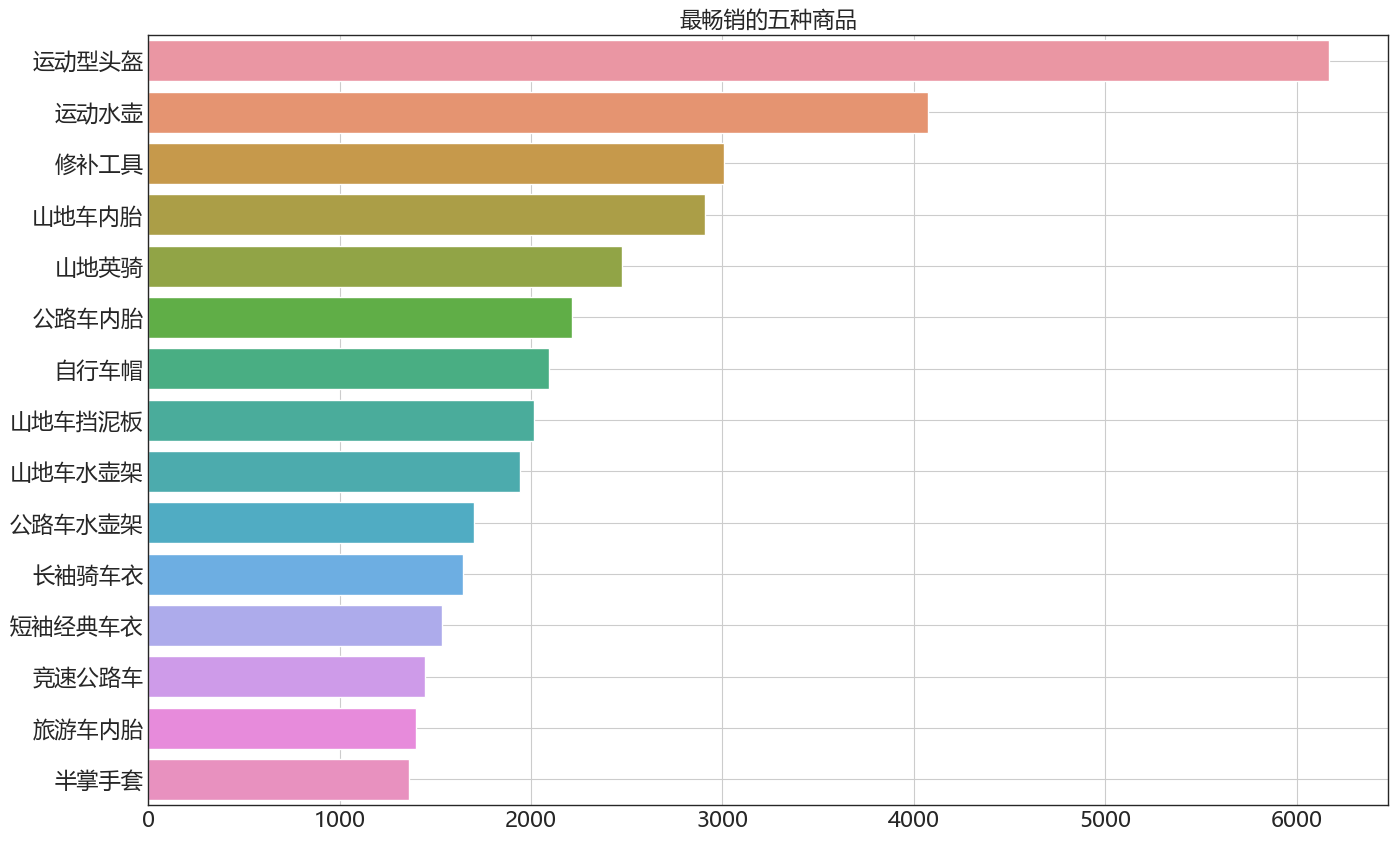

In [10]:
top_15 = bestseller.head(15)
sns.barplot(data=top_15,x='count',y='Model')
plt.xlabel("")
plt.ylabel("")
plt.title("最畅销的五种商品")
plt.grid(True)

In [11]:
top_15=top_15['Model'].tolist()
print("最畅销的15件商品是: \n")
for i in range(0,15,5):
    print(top_15[i:i+5])

最畅销的15件商品是: 

['运动型头盔', '运动水壶', '修补工具', '山地车内胎', '山地英骑']
['公路车内胎', '自行车帽', '山地车挡泥板', '山地车水壶架', '公路车水壶架']
['长袖骑车衣', '短袖经典车衣', '竞速公路车', '旅游车内胎', '半掌手套']


# 关联算法

## Apriori

In [12]:
from mlxtend.frequent_patterns import apriori as apri
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules

In [13]:
baskets=bike.groupby('OrderNumber')['Model'].apply(lambda x: x.tolist())
baskets=list(baskets)

In [14]:
te = TransactionEncoder()
baskets_tf = te.fit_transform(baskets)
df = pd.DataFrame(baskets_tf,columns=te.columns_)
print(df.head(5))

   Women's Mountain Shorts  hl公路外胎  hl山地外胎  ll公路车外胎  ll山地胎  ml公路外胎  ml山地外胎  \
0                    False   False   False    False  False   False   False   
1                    False   False   False    False  False   False   False   
2                    False   False   False    False  False   False   False   
3                    False    True   False    False  False   False   False   
4                    False   False   False    False  False   False   False   

   万能自行车座   修补工具  公路车350  ...    水壶包   洗车喷剂  短袖经典车衣  竞速公路车    竞速袜   经典背心  \
0   False  False   False  ...  False  False   False  False  False  False   
1   False  False   False  ...  False  False   False  False  False  False   
2   False  False   False  ...  False  False   False  False  False  False   
3    True  False   False  ...  False  False   False  False  False  False   
4   False  False   False  ...  False  False   False  False  False  False   

    自行车帽  运动型头盔   运动水壶  长袖骑车衣  
0  False  False  False  False  
1  False  

In [15]:
#设置支持度求频繁项集
start = time.perf_counter()
frequent_items=apri(df,min_support=0.01,use_colnames=True)
#求关联规则,设置最小置信度为0.15
rules=association_rules(frequent_items,metric='confidence',min_threshold=0.1)
end = time.perf_counter()
print(u'\n搜索完成，用时：%0.2f秒' %(end-start))
#设置最小提升度
#rules=rules.drop(rules[rules['lift']<1.0].index)


搜索完成，用时：0.07秒


In [16]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
110,(hl山地外胎),"(山地车内胎, 山地英骑)",0.062621,0.015573,0.015573,0.248685,15.969196,0.014598,1.310273
107,"(山地车内胎, 山地英骑)",(hl山地外胎),0.015573,0.062621,0.015573,1.000000,15.969196,0.014598,inf
172,"(旅游自行车外胎(通用), 运动型头盔)",(旅游车内胎),0.011103,0.065726,0.011103,1.000000,15.214746,0.010373,inf
174,(旅游车内胎),"(旅游自行车外胎(通用), 运动型头盔)",0.065726,0.011103,0.011103,0.168933,15.214746,0.010373,1.189913
82,(旅游车内胎),(旅游自行车外胎(通用)),0.065726,0.041449,0.035662,0.542591,13.090553,0.032938,2.095611
...,...,...,...,...,...,...,...,...,...
22,(ml公路外胎),(运动型头盔),0.041873,0.290332,0.010398,0.248315,0.855279,-0.001759,0.944103
72,(山地车挡泥板),(运动水壶),0.094754,0.191767,0.014444,0.152433,0.794888,-0.003727,0.953592
93,(自行车帽),(运动型头盔),0.098565,0.290332,0.021924,0.222434,0.766139,-0.006692,0.912680
50,(公路车水壶架),(运动型头盔),0.080075,0.290332,0.017690,0.220917,0.760911,-0.005558,0.910902


* lhs: 被称为左手规则，即用户购买的商品 - 山地车内胎
* rhs: 被称为右手规则，即根据用户购买某商品来推荐的另一件商品 - ll山地胎

In [17]:
rules.rename(columns = {'antecedents':'lhs','consequents':'rhs','support':'sup','confidence':'conf'},inplace = True)
rules= rules[['lhs','rhs','sup','conf','lift']]
rules

,lhs,rhs,sup,conf,lift
0,(hl公路外胎),(修补工具),0.010209,0.269900,1.905892
1,(公路车内胎),(hl公路外胎),0.025970,0.249097,6.585282
2,(hl公路外胎),(公路车内胎),0.025970,0.686567,6.585282
3,(hl山地外胎),(修补工具),0.017455,0.278738,1.968296
4,(修补工具),(hl山地外胎),0.017455,0.123256,1.968296
...,...,...,...,...,...
171,"(旅游车内胎, 运动型头盔)",(旅游自行车外胎(通用)),0.011103,0.522124,12.596758
172,"(旅游自行车外胎(通用), 运动型头盔)",(旅游车内胎),0.011103,1.000000,15.214746
173,"(旅游车内胎, 旅游自行车外胎(通用))",(运动型头盔),0.011103,0.311346,1.072379
174,(旅游车内胎),"(旅游自行车外胎(通用), 运动型头盔)",0.011103,0.168933,15.214746


## 筛选互补品和互斥品

In [18]:
complementary=rules[rules['lift']>1].sort_values('lift',ascending=False).head(20)

In [19]:
exclusive=rules[rules['lift']<1].sort_values('lift',ascending=True).head(20)

## 获得最大的营销响应率(根据置信度挑选）

In [20]:
# 使用的是左手规则：lhs(left hand rules)，lhs 表示的是购买的产品
 ## 使用 frozenset 来对字典的键进行选择
purchase_good = rules[rules['lhs'] == frozenset({'山地英骑'})]
purchase_good.sample(3)

,lhs,rhs,sup,conf,lift
62,(山地英骑),(运动型头盔),0.033404,0.286637,0.987274
56,(山地英骑),(山地车内胎),0.015573,0.133629,0.976717
111,(山地英骑),"(山地车内胎, hl山地外胎)",0.015573,0.133629,3.104145


In [21]:
purchase_good.sort_values('conf',ascending=False)

,lhs,rhs,sup,conf,lift
57,(山地英骑),(山地车挡泥板),0.034345,0.294711,3.110273
60,(山地英骑),(山地车水壶架),0.034110,0.292693,3.205144
62,(山地英骑),(运动型头盔),0.033404,0.286637,0.987274
64,(山地英骑),(运动水壶),0.027711,0.237788,1.239984
154,(山地英骑),"(运动水壶, 山地车水壶架)",0.027711,0.237788,3.114095
6,(山地英骑),(hl山地外胎),0.023524,0.201857,3.223495
56,(山地英骑),(山地车内胎),0.015573,0.133629,0.976717
111,(山地英骑),"(山地车内胎, hl山地外胎)",0.015573,0.133629,3.104145
31,(山地英骑),(修补工具),0.015385,0.132015,0.932216


如果一个顾客下单了山地英骑这个产品，那么应该推荐山地车挡泥板，可以获得较高的营销响应率

## 获得最大化销售额（根据提升度）

In [22]:
purchase_good.sort_values('lift',ascending=False)

,lhs,rhs,sup,conf,lift
6,(山地英骑),(hl山地外胎),0.023524,0.201857,3.223495
60,(山地英骑),(山地车水壶架),0.034110,0.292693,3.205144
154,(山地英骑),"(运动水壶, 山地车水壶架)",0.027711,0.237788,3.114095
57,(山地英骑),(山地车挡泥板),0.034345,0.294711,3.110273
111,(山地英骑),"(山地车内胎, hl山地外胎)",0.015573,0.133629,3.104145
64,(山地英骑),(运动水壶),0.027711,0.237788,1.239984
62,(山地英骑),(运动型头盔),0.033404,0.286637,0.987274
56,(山地英骑),(山地车内胎),0.015573,0.133629,0.976717
31,(山地英骑),(修补工具),0.015385,0.132015,0.932216


如果一个顾客下单了山地英骑这个产品，那么应该推荐hl山地外胎，可以获得最大的销售额，则该用户购买hl山地外胎的概率是单独购买B的3.22倍。

## 用户未进行消费的推荐

In [23]:
#如果希望推荐山地英骑自行车，应该如何制定营销策略？
# 这里应该选出右手规则，因为直接就是推荐的产品，没有产生消费，消费了的即买了的才使用左手规则
purchase_good = rules[rules['rhs'] == frozenset({'山地英骑'})].sort_values('lift',ascending=False)
# 根据置信度或提升度排序都可以，因为直接根据右手规则选出来的数据框中，
 ## confidence 和 lift 成正比例关系，你高我就高
purchase_good


,lhs,rhs,sup,conf,lift
147,"(运动型头盔, 山地车水壶架)",(山地英骑),0.010351,0.413534,3.548511
5,(hl山地外胎),(山地英骑),0.023524,0.375657,3.223495
59,(山地车水壶架),(山地英骑),0.034110,0.373519,3.205144
151,"(运动水壶, 山地车水壶架)",(山地英骑),0.027711,0.362908,3.114095
58,(山地车挡泥板),(山地英骑),0.034345,0.362463,3.110273
106,"(山地车内胎, hl山地外胎)",(山地英骑),0.015573,0.361749,3.104145
63,(运动水壶),(山地英骑),0.027711,0.144504,1.239984
61,(运动型头盔),(山地英骑),0.033404,0.115054,0.987274
55,(山地车内胎),(山地英骑),0.015573,0.113824,0.976717
30,(修补工具),(山地英骑),0.015385,0.108638,0.932216


所以山地英骑跟山地车水壶架，运动型头盔，hl山地外胎一起推荐比较好

# FP Tree

In [24]:
from mlxtend.frequent_patterns import fpgrowth

In [25]:
start1=time.perf_counter()
f_items=fpgrowth(df, min_support=0.01, use_colnames=True)
frules=association_rules(f_items, metric="confidence", min_threshold=0.1)
end1=time.perf_counter()
print(u'\n搜索完成，用时：%0.2f秒' %(end1-start1))


搜索完成，用时：0.08秒


In [26]:
frules.rename(columns = {'antecedents':'lhs','consequents':'rhs','support':'sup','confidence':'conf'},inplace = True)
frules= frules[['lhs','rhs','sup','conf','lift']]
frules

,lhs,rhs,sup,conf,lift
0,(公路车水壶架),(运动水壶),0.071183,0.888954,4.635604
1,(运动水壶),(公路车水壶架),0.071183,0.371197,4.635604
2,(公路车水壶架),(运动型头盔),0.017690,0.220917,0.760911
3,(公路车水壶架),(自行车帽),0.010445,0.130435,1.323337
4,(自行车帽),(公路车水壶架),0.010445,0.105967,1.323337
...,...,...,...,...,...
171,(水壶包),(运动水壶),0.013315,0.400850,2.090300
172,(ll山地胎),(修补工具),0.013456,0.357947,2.527632
173,(山地车内胎),(ll山地胎),0.021077,0.154058,4.098245
174,(ll山地胎),(山地车内胎),0.021077,0.560701,4.098245


## 获取最大营销响应率

In [27]:
purchase=frules[frules['lhs']==frozenset({'山地英骑'})]

In [28]:
purchase.sort_values('conf',ascending=False)

,lhs,rhs,sup,conf,lift
148,(山地英骑),(山地车挡泥板),0.034345,0.294711,3.110273
29,(山地英骑),(山地车水壶架),0.034110,0.292693,3.205144
21,(山地英骑),(运动型头盔),0.033404,0.286637,0.987274
19,(山地英骑),(运动水壶),0.027711,0.237788,1.239984
39,(山地英骑),"(运动水壶, 山地车水壶架)",0.027711,0.237788,3.114095
81,(山地英骑),(hl山地外胎),0.023524,0.201857,3.223495
23,(山地英骑),(山地车内胎),0.015573,0.133629,0.976717
90,(山地英骑),"(山地车内胎, hl山地外胎)",0.015573,0.133629,3.104145
25,(山地英骑),(修补工具),0.015385,0.132015,0.932216


如果一个顾客下单了山地英骑这个产品，那么应该推荐山地车挡泥板，可以获得较高的营销响应率

## 获取最大化销售额

In [29]:
purchase.sort_values('lift',ascending=False)

,lhs,rhs,sup,conf,lift
81,(山地英骑),(hl山地外胎),0.023524,0.201857,3.223495
29,(山地英骑),(山地车水壶架),0.034110,0.292693,3.205144
39,(山地英骑),"(运动水壶, 山地车水壶架)",0.027711,0.237788,3.114095
148,(山地英骑),(山地车挡泥板),0.034345,0.294711,3.110273
90,(山地英骑),"(山地车内胎, hl山地外胎)",0.015573,0.133629,3.104145
19,(山地英骑),(运动水壶),0.027711,0.237788,1.239984
21,(山地英骑),(运动型头盔),0.033404,0.286637,0.987274
23,(山地英骑),(山地车内胎),0.015573,0.133629,0.976717
25,(山地英骑),(修补工具),0.015385,0.132015,0.932216


## 用户未消费推荐策略

In [30]:
recom=frules[frules['rhs']==frozenset({'山地英骑'})]
recom.sort_values('lift',ascending=False)

,lhs,rhs,sup,conf,lift
47,"(运动型头盔, 山地车水壶架)",(山地英骑),0.010351,0.413534,3.548511
80,(hl山地外胎),(山地英骑),0.023524,0.375657,3.223495
28,(山地车水壶架),(山地英骑),0.034110,0.373519,3.205144
36,"(运动水壶, 山地车水壶架)",(山地英骑),0.027711,0.362908,3.114095
149,(山地车挡泥板),(山地英骑),0.034345,0.362463,3.110273
85,"(山地车内胎, hl山地外胎)",(山地英骑),0.015573,0.361749,3.104145
18,(运动水壶),(山地英骑),0.027711,0.144504,1.239984
20,(运动型头盔),(山地英骑),0.033404,0.115054,0.987274
22,(山地车内胎),(山地英骑),0.015573,0.113824,0.976717
24,(修补工具),(山地英骑),0.015385,0.108638,0.932216


## 我们发现Apriori和FP tree的结果相同，但是后者较快，因为只需要扫描两次